In [1]:
import numpy as np
import gymnasium as gym
import random
import time
from IPython.display import clear_output

In [2]:
env=gym.make('FrozenLake-v1',render_mode="rgb_array")

In [3]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [4]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
print(action_size)
print(state_size)

4
16


In [6]:
total_episodes = 10000        # Total episodes
learning_rate = 0.1           # Learning rate
max_steps = 100                # Max steps per episode
gamma = 0.99                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.001            # Exponential decay rate for exploration prob

# **Train Q-learning Agent**

In [7]:

# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()[0]
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done,truncated, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print("\n\n********Q-table********\n")
print(qtable)

Score over time: 0.5258


********Q-table********

[[0.56959187 0.50699362 0.50857047 0.50531495]
 [0.17877975 0.34913966 0.24275415 0.45209245]
 [0.39649002 0.29400984 0.29189157 0.27449718]
 [0.15197053 0.08252745 0.0336375  0.0367705 ]
 [0.58755734 0.48041548 0.43184202 0.36889269]
 [0.         0.         0.         0.        ]
 [0.39593496 0.13025868 0.12012434 0.13636185]
 [0.         0.         0.         0.        ]
 [0.42888351 0.33214294 0.3750769  0.64305519]
 [0.431334   0.72092848 0.40239032 0.41898489]
 [0.64279448 0.42539423 0.37559318 0.38859535]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.52169463 0.63878397 0.77503921 0.45170728]
 [0.75359009 0.86467883 0.74072037 0.77771818]
 [0.         0.         0.         0.        ]]


In [8]:
rewards_per_thousand_episodes = np.split(np.array(rewards),total_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.05100000000000004
2000 :  0.21400000000000016
3000 :  0.4050000000000003
4000 :  0.5510000000000004
5000 :  0.6300000000000004
6000 :  0.6610000000000005
7000 :  0.6560000000000005
8000 :  0.7280000000000005
9000 :  0.6720000000000005
10000 :  0.6900000000000005


In [9]:

# env.reset()
# for episode in range(3):
#     state = env.reset()[0]
#     done = False
#     print("****************************************************")
#     print("EPISODE ", episode+1)
#     time.sleep(1)
#     for step in range(max_steps):
#         clear_output(wait=True)
#         env.render()
#         time.sleep(0.3)
#         # Take the action (index) that have the maximum expected future reward given that state
#         action = np.argmax(qtable[state,:])
        
#         new_state, reward, done, truncated, info = env.step(action)
        
#         if done:
#             clear_output(wait=True)
#             env.render()
#             if reward == 1:
#                 print("****You reached the goal!****")
#                 time.sleep(3)
#             else:
#                 print("****You fell through a hole!****")
#                 time.sleep(3)
#             clear_output(wait=True)
#             break
#         state=new_state
# env.close()

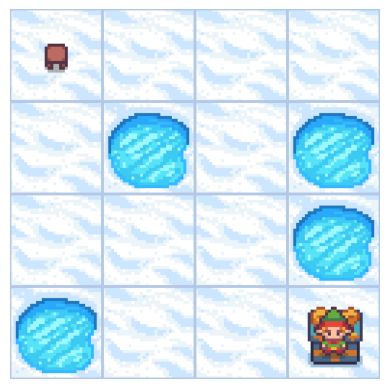

****You reached the goal!****


In [10]:
import matplotlib.pyplot as plt

def display_frame(frame):
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

for episode in range(3):
    state = env.reset()[0]
    done = False
    print("****************************************************")
    print("EPISODE ", episode + 1)
    time.sleep(1)
    for step in range(max_steps):
        clear_output(wait=True)
        frame = env.render()
        display_frame(frame)
        time.sleep(0.3)
        
        # Take the action (index) that has the maximum expected future reward given that state
        action = np.argmax(qtable[state, :])
        
        new_state, reward, done, truncated, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            frame = env.render()
            display_frame(frame)
            if reward == 1:
                print("****You reached the goal!****")
            else:
                print("****You fell through a hole!****")
            time.sleep(3)
            clear_output(wait=True)
            break
        state = new_state

env.close()

In [11]:
env.reset()

for episode in range(5):
    state = env.reset()[0]
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done,_, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
Number of steps 32
****************************************************
EPISODE  1
Number of steps 44
****************************************************
EPISODE  2
Number of steps 28
****************************************************
EPISODE  3
Number of steps 34
****************************************************
EPISODE  4
Number of steps 32
